# Citi Bike Data Findings

## Shakhawat Hassan

#### I use Citi bike data from LYFT'S website and where Citi bike operates in NYC. I have found very interesting findings below

In [ ]:
from timeit import default_timer as timer
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

## Data Exploration

In [2]:
df = pd.read_csv('2020feb_citibike.csv')

In [3]:
df.shape 

(22962, 15)

In [4]:
#22,962 rows and 15 columns

In [5]:
df.isnull().sum()       #nulls checking

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

In [6]:
df.duplicated().sum()          #There is no duplicate

0

In [7]:
df.tail()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
22957,262,2020-02-29 23:40:53.1620,2020-02-29 23:45:15.3180,3639,Harborside,40.719252,-74.034234,3214,Essex Light Rail,40.712774,-74.036486,42467,Subscriber,1967,1
22958,216,2020-02-29 23:41:01.3350,2020-02-29 23:44:38.0350,3186,Grove St PATH,40.719586,-74.043117,3483,Montgomery St,40.719420,-74.050990,42377,Subscriber,1958,1
22959,101,2020-02-29 23:45:22.1700,2020-02-29 23:47:03.2970,3214,Essex Light Rail,40.712774,-74.036486,3681,Grand St,40.715178,-74.037683,42485,Subscriber,1967,1
22960,279,2020-02-29 23:47:56.8380,2020-02-29 23:52:36.6400,3186,Grove St PATH,40.719586,-74.043117,3483,Montgomery St,40.719420,-74.050990,42531,Subscriber,1988,1
22961,212,2020-02-29 23:49:18.4510,2020-02-29 23:52:50.7490,3184,Paulus Hook,40.714145,-74.033552,3276,Marin Light Rail,40.714584,-74.042817,42385,Subscriber,1967,1


In [8]:
df['bikeid'].count()

22962

#### 22962 users who rented citi bikes in February 2020

In [10]:
df['tripduration'].nlargest() 

4994     1495458
4860      345608
19204     290697
6293      245410
12027     221936
Name: tripduration, dtype: int64

In [11]:
df.info() #data type checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             22962 non-null  int64  
 1   starttime                22962 non-null  object 
 2   stoptime                 22962 non-null  object 
 3   start station id         22962 non-null  int64  
 4   start station name       22962 non-null  object 
 5   start station latitude   22962 non-null  float64
 6   start station longitude  22962 non-null  float64
 7   end station id           22962 non-null  int64  
 8   end station name         22962 non-null  object 
 9   end station latitude     22962 non-null  float64
 10  end station longitude    22962 non-null  float64
 11  bikeid                   22962 non-null  int64  
 12  usertype                 22962 non-null  object 
 13  birth year               22962 non-null  int64  
 14  gender                

In [12]:
df.mean() #mean checking

tripduration                 665.692927
start station id            3307.954446
start station latitude        40.722765
start station longitude      -74.046948
end station id              3308.074819
end station latitude          40.722323
end station longitude        -74.046393
bikeid                     41376.724153
birth year                  1981.129997
gender                         1.195976
dtype: float64

In [13]:
df.describe() #stats checking

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,2.296200e+04,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000
mean,6.656929e+02,3307.954446,40.722765,-74.046948,3308.074819,40.722323,-74.046393,41376.724153,1981.129997,1.195976
std,1.092407e+04,184.877308,0.006696,0.011348,189.016475,0.006509,0.011213,3551.166582,10.300961,0.494564
min,6.100000e+01,3184.000000,40.711130,-74.083639,83.000000,40.683826,-74.083639,17273.000000,1888.000000,0.000000
25%,2.260000e+02,3195.000000,40.718355,-74.050656,3194.000000,40.718355,-74.050444,42192.000000,1976.000000,1.000000
50%,3.295000e+02,3211.000000,40.721630,-74.044247,3211.000000,40.721124,-74.043117,42325.000000,1983.000000,1.000000
75%,5.170000e+02,3278.000000,40.727224,-74.038526,3278.000000,40.726012,-74.038051,42458.000000,1989.000000,1.000000
max,1.495458e+06,3792.000000,40.748716,-74.032108,3792.000000,40.748716,-73.976323,42636.000000,2003.000000,2.000000


In [14]:
# 'start station id' , 'end station id', bikeid, should to be string, "birth year' is timedate, 'gender' is categorical

In [15]:
top_start_station = df['start station name'].value_counts().head(15)
top_start_station

Grove St PATH                 2328
Sip Ave                       1402
Hamilton Park                 1202
Harborside                    1058
Newport PATH                   978
Columbus Dr at Exchange Pl     922
Marin Light Rail               746
City Hall                      683
Newport Pkwy                   657
Brunswick & 6th                654
Newark Ave                     631
McGinley Square                531
Jersey & 3rd                   526
Monmouth and 6th               521
Manila & 1st                   517
Name: start station name, dtype: int64

Top 3 start stations are Grove St PATH, Sip Ave, and Hamilton Park.

In [16]:
top_end_station = df['end station name'].value_counts().head(15)
top_end_station

Grove St PATH                 3109
Sip Ave                       1342
Harborside                    1087
Hamilton Park                 1051
Columbus Dr at Exchange Pl    1003
Newport PATH                   964
Marin Light Rail               716
City Hall                      708
Newport Pkwy                   659
Newark Ave                     648
Manila & 1st                   565
Warren St                      556
Jersey & 3rd                   528
Columbus Drive                 522
Washington St                  499
Name: end station name, dtype: int64

Top 3 end stations are Grove St PATH, Sip Ave, and Harborside.

In [17]:
df.std() #standard deviation

tripduration               10924.072660
start station id             184.877308
start station latitude         0.006696
start station longitude        0.011348
end station id               189.016475
end station latitude           0.006509
end station longitude          0.011213
bikeid                      3551.166582
birth year                    10.300961
gender                         0.494564
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D25021CD0>,
      dtype=object)

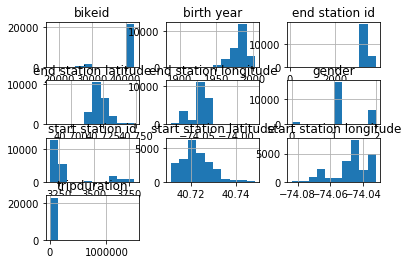

In [18]:
df.hist()

### Exploratory Analysis

There are 22,962 users who rented Citi bikes in February 2020. The highest trip was 1,495,458 secs and it was taken by the bike id of 42228. The average trip duration is 665 seconds. Top 3 start stations are Grove St PATH, Sip Ave, and Hamilton Park. Top 3 end stations are Grove St PATH, Sip Ave, and Harborside. Some data types should be cleaned. 


## Data Wrangling

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             22962 non-null  int64  
 1   starttime                22962 non-null  object 
 2   stoptime                 22962 non-null  object 
 3   start station id         22962 non-null  int64  
 4   start station name       22962 non-null  object 
 5   start station latitude   22962 non-null  float64
 6   start station longitude  22962 non-null  float64
 7   end station id           22962 non-null  int64  
 8   end station name         22962 non-null  object 
 9   end station latitude     22962 non-null  float64
 10  end station longitude    22962 non-null  float64
 11  bikeid                   22962 non-null  int64  
 12  usertype                 22962 non-null  object 
 13  birth year               22962 non-null  int64  
 14  gender                

In [20]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,841,2020-02-01 00:02:13.7650,2020-02-01 00:16:15.4720,3199,Newport Pkwy,40.728745,-74.032108,3213,Van Vorst Park,40.718489,-74.047727,42217,Subscriber,1980,1
1,206,2020-02-01 00:16:11.3850,2020-02-01 00:19:37.4460,3273,Manila & 1st,40.721651,-74.042884,3639,Harborside,40.719252,-74.034234,42160,Subscriber,1990,1
2,859,2020-02-01 00:23:22.1090,2020-02-01 00:37:41.5060,3185,City Hall,40.717733,-74.043845,3268,Lafayette Park,40.713464,-74.062859,42204,Customer,1991,1
3,693,2020-02-01 00:25:14.5170,2020-02-01 00:36:48.0280,3185,City Hall,40.717733,-74.043845,3277,Communipaw & Berry Lane,40.714358,-74.066611,42165,Subscriber,1987,1
4,1473,2020-02-01 00:32:30.5050,2020-02-01 00:57:04.3740,3192,Liberty Light Rail,40.711242,-74.055701,3639,Harborside,40.719252,-74.034234,26156,Customer,1969,0


In [21]:
#drop unnecessary columns
df.drop(['start station id', 'start station latitude',
         'start station longitude', 'end station id', 'end station latitude', 'end station longitude'], axis =1, inplace=True)

In [22]:
#Change columns' names
df.rename(columns={'tripduration': 'trip_duration' , 'starttime': 'start_time', 
                   'start station name':'start_station_name', 'end station name':'end_station_name',
                   'stoptime': 'stop_time', 'bikeid':'bike_id', 'usertype':'user_type', 'birth year': 'birth_year'}, inplace =True)

In [23]:
df.columns

Index(['trip_duration', 'start_time', 'stop_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'birth_year', 'gender'],
      dtype='object')

In [24]:
# fixing data types

In [25]:
# string to datetime
df['start_time'] = pd.to_datetime(df['start_time'].str.strip())
df['stop_time'] = pd.to_datetime(df['stop_time'].str.strip())

In [42]:
# integer to object
df['bike_id'] = df['bike_id'].apply(str)

In [43]:
# integer to category
df['gender'] = df['gender'].astype('category')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22962 entries, 0 to 22961
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   trip_duration       22962 non-null  int64         
 1   start_time          22962 non-null  datetime64[ns]
 2   stop_time           22962 non-null  datetime64[ns]
 3   start_station_name  22962 non-null  object        
 4   end_station_name    22962 non-null  object        
 5   bike_id             22962 non-null  object        
 6   user_type           22962 non-null  object        
 7   birth_year          22962 non-null  int64         
 8   gender              22962 non-null  category      
dtypes: category(1), datetime64[ns](2), int64(2), object(4)
memory usage: 1.4+ MB


## Data Wrangling Summary
- drop unnecessary columns
### Fixing data types
- string to datetime
- integer to object
- integer to category


## Data Explanatory

In [29]:
df.describe()

,trip_duration,birth_year
count,2.296200e+04,22962.000000
mean,6.656929e+02,1981.129997
std,1.092407e+04,10.300961
min,6.100000e+01,1888.000000
25%,2.260000e+02,1976.000000
50%,3.295000e+02,1983.000000
75%,5.170000e+02,1989.000000
max,1.495458e+06,2003.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020D24595070>,
      dtype=object)

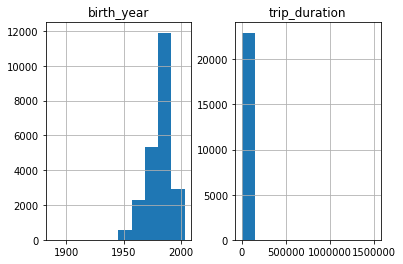

In [30]:
df.hist()

In [31]:
# Most males rent Citi bikes than females or unknown gender. Most of them born between 1975 and 1990.

In [32]:
df.head()

,trip_duration,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender
0,841,2020-02-01 00:02:13.765,2020-02-01 00:16:15.472,Newport Pkwy,Van Vorst Park,42217,Subscriber,1980,1
1,206,2020-02-01 00:16:11.385,2020-02-01 00:19:37.446,Manila & 1st,Harborside,42160,Subscriber,1990,1
2,859,2020-02-01 00:23:22.109,2020-02-01 00:37:41.506,City Hall,Lafayette Park,42204,Customer,1991,1
3,693,2020-02-01 00:25:14.517,2020-02-01 00:36:48.028,City Hall,Communipaw & Berry Lane,42165,Subscriber,1987,1
4,1473,2020-02-01 00:32:30.505,2020-02-01 00:57:04.374,Liberty Light Rail,Harborside,26156,Customer,1969,0


## Data Exploration by Variations

### Top 10 Bike Start Station

Text(0.5, 1.0, 'Top Ten Start Station')

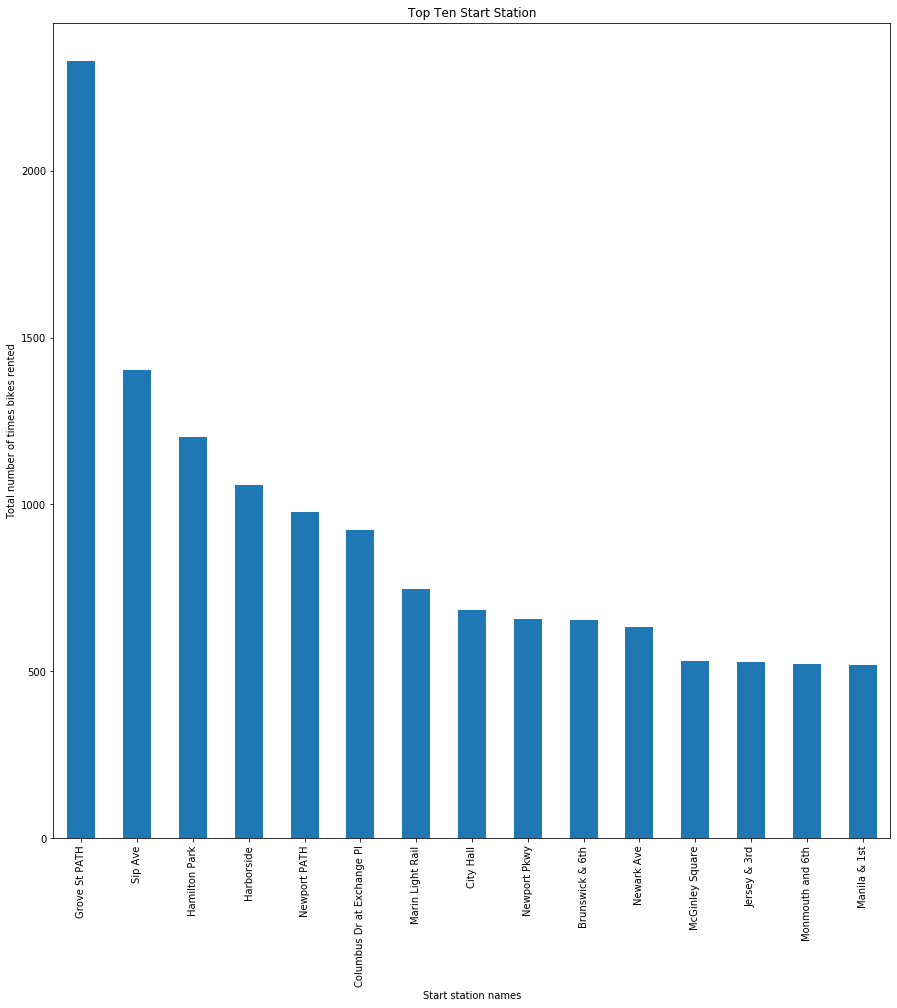

In [58]:
top_start_station.plot.bar(figsize = (15,15))
plt.xticks(rotation =90)
plt.xlabel('Start station names')
plt.ylabel('Total number of times bikes rented')
plt.title('Top Ten Start Station')

In [97]:
#### Visualization of top 10 start stations.

### Top 10 Bike End Station

Text(0.5, 1.0, 'Top Ten End Station')

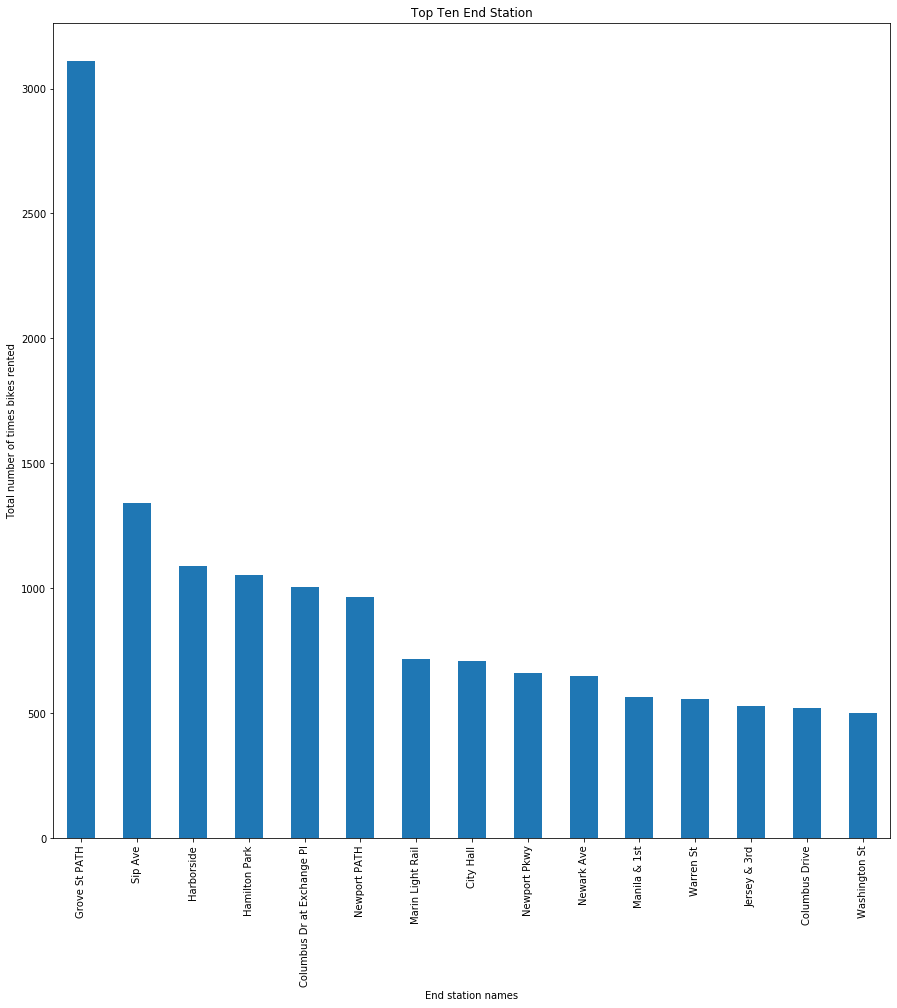

In [59]:
top_end_station.plot.bar(figsize = (15,15))
plt.xticks(rotation =90)
plt.xlabel('End station names')
plt.ylabel('Total number of times bikes rented')
plt.title('Top Ten End Station')

In [98]:
#### Visualization of top 10 end stations.

#### Bike renting vs Gender

Text(0.5, 1.0, 'Total number of times bikes rented vs gender')

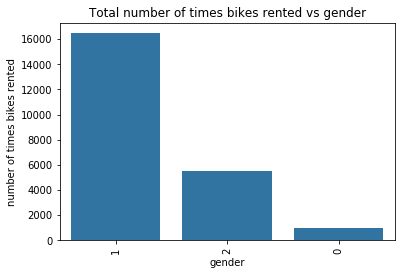

In [62]:
base_color = sb.color_palette()[0]
gender_order = df['gender'].value_counts().index
sb.countplot(data= df, x = 'gender', color = base_color, order = gender_order)
plt.xticks(rotation =90)
plt.xlabel('gender')
plt.ylabel('number of times bikes rented')
plt.title('Total number of times bikes rented vs gender')

In [99]:
# males are renting more bikes than females and unknown gender

### Does the above depend on if a user is a subscriber or customer?

#### Bike renting vs User Type

Text(0.5, 1.0, 'total number of times bikes rented vs User Type')

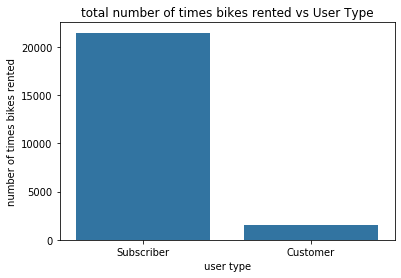

In [64]:
base_color = sb.color_palette()[0]
user_order = df['user_type'].value_counts().index
sb.countplot(data= df, x = 'user_type', color = base_color, order = user_order)
plt.xlabel('user type')
plt.ylabel('number of times bikes rented')
plt.title('total number of times bikes rented vs User Type')

In [101]:
# Subscribers are renting more bikes than regular customers

#### Bike renting vs Birth Year

(array([2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.390e+02,
        2.310e+03, 5.311e+03, 1.190e+04, 2.898e+03]),
 array([1888. , 1899.5, 1911. , 1922.5, 1934. , 1945.5, 1957. , 1968.5,
        1980. , 1991.5, 2003. ]),
 <a list of 10 Patch objects>)

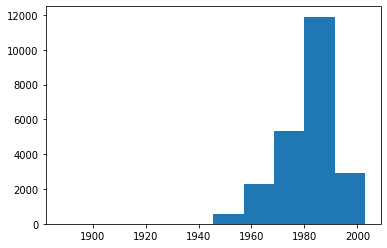

In [66]:
plt.hist(data = df, x = 'birth_year')

In [102]:
# histogram of renters' age

### How long does the average trip take?


In [54]:
df['trip_duration'].mean()

665.6929274453445

The average trip takes 665 seconds which equals to 11 minutes 09 seconds

In [82]:
df['trip_duration'].nlargest(15)
                             

4994     1495458
4860      345608
19204     290697
6293      245410
12027     221936
18466     197074
22840     157660
22886     149410
8720      117897
12597      95085
5409       90388
16170      89655
17222      87328
19237      85303
22772      78647
Name: trip_duration, dtype: int64

In [85]:
top_trips = df.nlargest(10, ['trip_duration'])
top_trips

,trip_duration,start_time,stop_time,start_station_name,end_station_name,bike_id,user_type,birth_year,gender
4994,1495458,2020-02-06 23:36:42.394,2020-02-24 07:01:00.938,JC Medical Center,Grove St PATH,42228,Customer,1969,0
4860,345608,2020-02-06 18:52:31.856,2020-02-10 18:52:40.774,Sip Ave,Atlantic Ave & Fort Greene Pl,42217,Customer,1994,2
19204,290697,2020-02-25 07:16:57.800,2020-02-28 16:01:55.520,Lincoln Park,JCBS Depot,42326,Subscriber,1984,2
6293,245410,2020-02-08 21:55:24.948,2020-02-11 18:05:35.899,Sip Ave,Grove St PATH,42479,Customer,1996,1
12027,221936,2020-02-16 21:43:35.712,2020-02-19 11:22:32.337,Harborside,Dixon Mills,42369,Subscriber,1990,1
18466,197074,2020-02-24 10:03:17.788,2020-02-26 16:47:52.511,Newport Pkwy,Warren St,42178,Customer,1969,0
22840,157660,2020-02-29 16:48:59.735,2020-03-02 12:36:40.591,Marin Light Rail,Paulus Hook,42146,Customer,1983,1
22886,149410,2020-02-29 18:22:52.975,2020-03-02 11:53:03.380,Sip Ave,Leonard Gordon Park,42444,Customer,1969,0
8720,117897,2020-02-12 09:10:16.071,2020-02-13 17:55:13.933,Jersey & 3rd,5 Corners Library,42586,Customer,1969,0
12597,95085,2020-02-17 17:08:51.167,2020-02-18 19:33:37.104,Sip Ave,City Hall,42113,Customer,1969,0


## Conclusion
#### Findings:
There are 22,962 users who rented Citi bikes in February 2020. The highest trip was 1,495,458 secs and it was taken by the bike id of 42228. The average trip duration is 665 seconds. Top 3 start stations are Grove St PATH, Sip Ave, and Hamilton Park. Top 3 end stations are Grove St PATH, Sip Ave, and Harborside. Some data types should be cleaned. Most males rent Citi bikes than females or unknown gender. Most of them born between 1975 and 1990. Most of them use bikes every day, they are males. There are more subscribers than regular customers who use Citi bike. The average trip takes 665 seconds which equals 11 minutes 09 seconds. The longest ride is 1495458 seconds which equals 17 days.

- https://www.citibikenyc.com/system-data
- https://s3.amazonaws.com/tripdata/index.html
- https://en.wikipedia.org/wiki/Citi_Bike